# Project: TMDB Movie Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The Movie Database (TMDb) is a popular, user editable database for movies and TV shows.

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
%matplotlib inline

Questions I am more interested into
1. Do runtime and revenue have some relationship?
2. Analyze data by revenue/budget ratio: categories, by time
3. Does the vote count affect vote grade?

<a id='wrangling'></a>
## Data Wrangling
### General Properties

Load the data and print last three rows to see how it looks like.

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


See what the columns are.

In [3]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

### Data Assessing

From columns above, and the head 3 rows of data. Some observations are assumed.
1. id, imdb_id: used as idenitification number, which does not contain meaning. **can be droppped.**
2. popularity: may refer to the population who watched the film.
3. budget, budget_adj: **budget can be dropped**, since budget_adj takes inflation into consideration.
4. revenue, revenue_adj: same as budget. **revenue can be dropped.**
5. cast: including multiple actor/actress, separated by pipeline symbol. needs more processing if we want to analyze cast.
6. homepage: homepage of the movie. not really useful, **can be dropped.**
7. tagline: the most catching sentence from each film. not really useful, **can be dropped.**
8. keywords: words related to each film. not really useful, **can be dropped.
9. overview: introduction about each file. not really useful, **can be dropped.**
10. runtime: how long for each film in minutes.
11. genres: multiple genres separated by pipeline symbol. needs more processing in the future.
12. release_date, release_year: film's exact release date might be wrong and it is less important than release year. **release_date can be dropped.**

For missing values, use info to analyze.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Since these columns (cast, director, genres, production_companies) are String type not numbers, it is unnecessary to fill in missing values. Better to analyze each film without any missing values.

See how many duplicate rows.

In [5]:
df.duplicated().sum()
# 1 duplicated row can be dropped later

1

Analyze column by column if their value missing or not.

(1) popularity   

No missing values in popularity.
Unit of popularity is not clear, maybe in million. values are all okay though. no negative or zero popularity.

In [6]:
print(df[df['popularity']<=0].shape[0])
print(df['popularity'].unique())

0
[32.985763 28.419936 13.112507 ...  0.065141  0.064317  0.035919]


(2) original_title: All films have title!

In [7]:
df['original_title'].isnull().sum()

0

(3) cast: 76 rows have no cast values, and there is no info to fill in.

In [8]:
df['cast'].isnull().sum()

76

(4) director: 44 rows have no director values, and there is no info to fill in.

In [9]:
df['director'].isnull().sum()

44

(5) runtime: films with runtime = 0 is wrong data! 31 films have wrong runtime values

In [10]:
print(np.sort(df['runtime'].unique()))
df[ df['runtime'] == 0 ].shape[0]

[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  36  38
  40  41  42  43  44  45  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 191 192 193 194 195 197 199 200 201 202 208 210 213
 214 216 219 220 223 224 225 226 229 230 233 235 236 240 242 246 247 248
 250 252 254 257 270 273 282 285 292 294 300 336 338 352 360 366 372 389
 400 417 421 470 500 501 540 550 561 566 705 877 90

31

(6) genres: 23 films miss genres info, no info to fill in.

In [11]:
df['genres'].isnull().sum()

23

(7) production_companies: 1030 films lack production companies info, no info to fill in.

In [12]:
df['production_companies'].isnull().sum()

1030

(8) vote_count: all okay

In [13]:
df['vote_count'].isnull().sum()

0

(9) vote_avererage: all okay

In [14]:
df['vote_average'].isnull().sum()

0

(10) release_year: all okay

In [15]:
np.sort(df['release_year'].unique())

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015], dtype=int64)

(11) budget_adj: 5696 films lack budget info

In [16]:
df[df['budget_adj']==0].shape[0]

5696

(12) renvenue_adj: 6016 films lack revenue info

In [17]:
df[df['revenue_adj']==0].shape[0]

6016

### Data Cleaning

1. drop columns

based on the observations, drop id, imdb_id, budget, revenue, homepage, tagline, keywords, overview, release_date

In [18]:
df.drop(['id', 'imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'keywords', 'overview', 'release_date'], axis=1, inplace=True)

2. drop duplicates

In [19]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10865 non-null  float64
 1   original_title        10865 non-null  object 
 2   cast                  10789 non-null  object 
 3   director              10821 non-null  object 
 4   runtime               10865 non-null  int64  
 5   genres                10842 non-null  object 
 6   production_companies  9835 non-null   object 
 7   vote_count            10865 non-null  int64  
 8   vote_average          10865 non-null  float64
 9   release_year          10865 non-null  int64  
 10  budget_adj            10865 non-null  float64
 11  revenue_adj           10865 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1.1+ MB


3.  get all conditioned dataframe (no missing or wrong values in runtime, revenue, budget)

3855 films matches this criteria.

In [20]:
df_rrb = df.query('runtime>0 and revenue_adj>0 and budget_adj>0')
df_rrb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3854 non-null   float64
 1   original_title        3854 non-null   object 
 2   cast                  3850 non-null   object 
 3   director              3853 non-null   object 
 4   runtime               3854 non-null   int64  
 5   genres                3854 non-null   object 
 6   production_companies  3808 non-null   object 
 7   vote_count            3854 non-null   int64  
 8   vote_average          3854 non-null   float64
 9   release_year          3854 non-null   int64  
 10  budget_adj            3854 non-null   float64
 11  revenue_adj           3854 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 391.4+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Do runtime and revenue have some relationship?)

Print unique values of runtime.

In [21]:
np.sort(df_rrb['runtime'].unique())

array([ 15,  26,  42,  62,  63,  66,  69,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 174, 175, 177, 178, 179, 180, 181, 182,
       183, 184, 186, 187, 188, 189, 191, 192, 193, 194, 195, 197, 199,
       200, 201, 202, 213, 214, 216, 219, 248, 338], dtype=int64)

Draw the histogram of runtime, see the distribution.

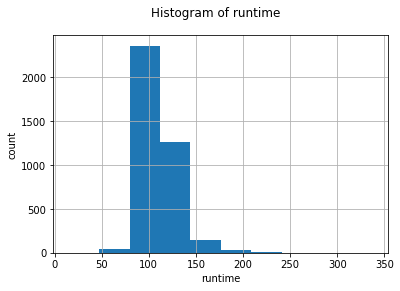

In [22]:
plt = df_rrb['runtime'].hist();
pl.suptitle('Histogram of runtime');
plt.set_xlabel('runtime');
plt.set_ylabel('count');

The distribution of runtime range mostly from 50 to 250. 

Use boxplot to see if there is outliers.

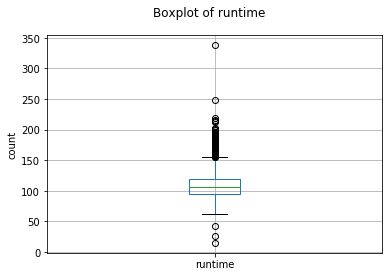

In [24]:
ax = df_rrb.boxplot(column=['runtime']);
pl.suptitle('Boxplot of runtime');
ax.set_ylabel('count');

From the boxplot, we notice there are many outliers. 

Implement a function using IQR to get high limit and low limit. These two values will divide data into main and outliers.

In [25]:
def get_limit(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    high_limit = Q3+1.5*IQR
    low_limit = Q1-1.5*IQR
    return high_limit, low_limit
high_limit, low_limit = get_limit(df_rrb['runtime'])
print(high_limit, low_limit)

155.0 59.0


Get runtime data filtering out outliers.

In [26]:
df_rrb_middle = df_rrb[(df_rrb['runtime']<=high_limit) & (df_rrb['runtime']>=low_limit)]

Draw the histogram of runtime without outliers. It looks more familiar to normal distribution.

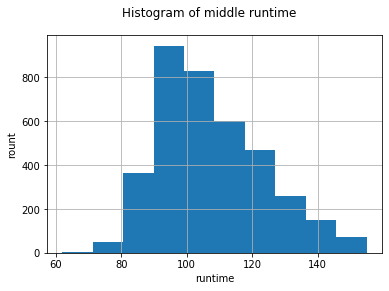

In [27]:
ax = df_rrb_middle['runtime'].hist();
pl.suptitle('Histogram of middle runtime');
ax.set_xlabel('runtime');
ax.set_ylabel('rount');

Histogram shows most films' runtime lies in 70 to 150 minutes.

Draw scatter plot of runtime and revenue_adj. See if the longer the runtime the better the revenue.

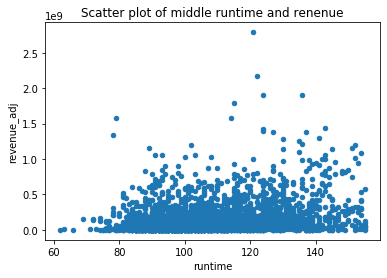

In [28]:
ax = df_rrb_middle.plot.scatter(x='runtime', y='revenue_adj', title='Scatter plot of middle runtime and renenue');
ax.set_xlabel("runtime");
ax.set_ylabel("revenue_adj");


The scatter plot of runtime v.s. revenue_adj shows positive correlation.

Draw scatter plot of runtime and budget_adj. See if the longer the runtime the higher the budget.

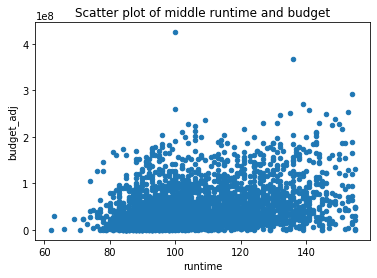

In [29]:
ax = df_rrb_middle.plot.scatter(x='runtime', y='budget_adj', title='Scatter plot of middle runtime and budget');
ax.set_xlabel("runtime");
ax.set_ylabel("budget_adj");

The scatter plot of runtime v.s. budget_adj shows positive correlation.

We now analyze the runtime high outliers.
First use high limit to extract high outliers.

In [30]:
df_rrb_high = df_rrb[(df_rrb['runtime']>high_limit)]

Plot scatter plot of high runtime and revenue. See if high outliers have different patterns than normal data.

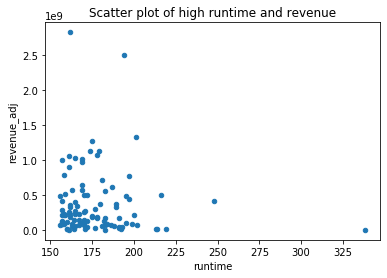

In [31]:
ax = df_rrb_high.plot.scatter(x='runtime', y='revenue_adj', title='Scatter plot of high runtime and revenue');
ax.set_xlabel('runtime');
ax.set_ylabel('revenue_adj');

Scatter plot of longer runtime(outliers) v.s. revenue shows negative correlation.

Likewise, draw scatter plot of high runtime and budget.

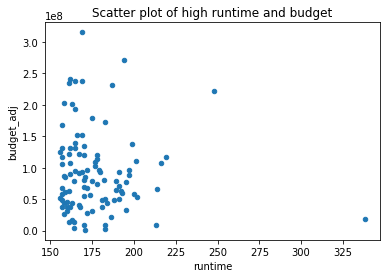

In [32]:
ax = df_rrb_high.plot.scatter(x='runtime', y='budget_adj', title='Scatter plot of high runtime and budget');
ax.set_xlabel('runtime');
ax.set_ylabel('budget_adj');

Scatter plot of longer runtime(outliers) v.s. budget also negative correlation.

### Research Question 2  (Analyze data by revenue/budget ratio: categories, by time?)

In [33]:
df_rrb.head(5)

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


Revenue/budget is a way to measure films.

Since the dataframe does not have a column of 'revenue/budget'. We will create it by dividing revenue by budget, then add it back to this dataframe.

In [34]:
val = df_rrb['revenue_adj'] / df_rrb['budget_adj']
df_rrb.insert(len(df_rrb.columns), 'revenue/budget', val)

We separate this dataframe into two dataframe: profit and unprofit,
using the criteria 'revenue/budget' > 1 .

In [35]:
df_rrb_prof = df_rrb[ df_rrb['revenue/budget'] > 1.0 ]
df_rrb_unprof = df_rrb[ df_rrb['revenue/budget'] <= 1.0 ]

In [36]:
df_rrb_prof['revenue/budget'].describe()

count    2.778000e+03
mean     4.133046e+02
std      1.936660e+04
min      1.000732e+00
25%      1.900334e+00
50%      3.028205e+00
75%      5.416677e+00
max      1.018619e+06
Name: revenue/budget, dtype: float64

Draw the histogram of revenue/budget to see the distribution.

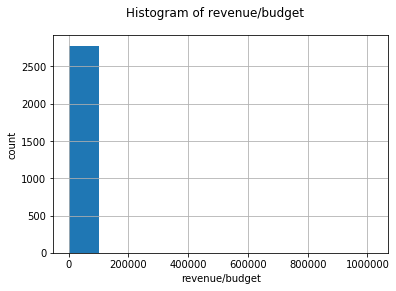

In [37]:
ax = df_rrb_prof['revenue/budget'].hist();
pl.suptitle('Histogram of revenue/budget');
ax.set_xlabel('revenue/budget');
ax.set_ylabel('count');

There is only one bin in the histogram, we suspect outliers influence the distribution.
Therefore, we draw the boxplot next.

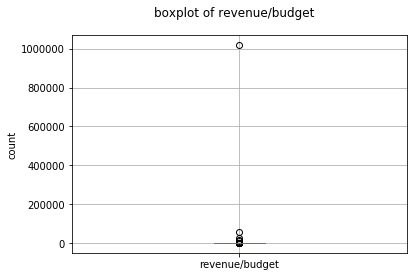

In [38]:
ax = df_rrb_prof.boxplot(column=['revenue/budget']);
pl.suptitle('boxplot of revenue/budget');
ax.set_ylabel('count');

The boxplot definitely shows outliers.

Use predefined get_limit function, get the high and low limit to filter outliers.

In [39]:
high_limit, low_limit = get_limit(df_rrb_prof['revenue/budget'])
print(high_limit, low_limit)

10.69119059707207 -3.3741795626876767


Value less than or equal high_limit are named df_ratio_middle.

In [40]:
df_ratio_middle = df_rrb_prof[df_rrb_prof['revenue/budget'] <= high_limit]

Draw histogram of df_ratio_middle.

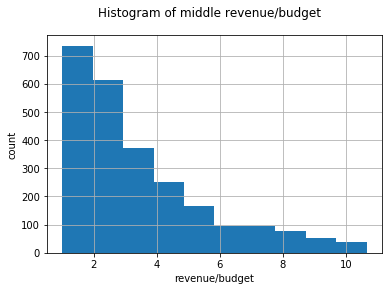

In [41]:
ax = df_ratio_middle['revenue/budget'].hist();
pl.suptitle('Histogram of middle revenue/budget');
ax.set_xlabel('revenue/budget');
ax.set_ylabel('count');

This histogram shows that most of the profit films have revenue/budget less than 10.

Value higher than high_limit are named df_ratio_high.

In [42]:
# outlier data
df_ratio_high = df_rrb_prof[df_rrb_prof['revenue/budget'] > high_limit]

Draw histogram of df_ratio_high.

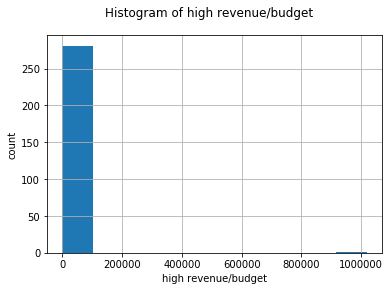

In [43]:
ax = df_ratio_high['revenue/budget'].hist();
pl.suptitle('Histogram of high revenue/budget');
ax.set_xlabel('high revenue/budget');
ax.set_ylabel('count');

There is one film standing out in this histogram, with a revenue/budget higher than 1,000,000 !

Out of curiosity, let's see what the most profitable film is.

In [44]:
df_ratio_high[df_ratio_high['revenue/budget'] > 1000000]

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue/budget
10495,0.772494,"The Karate Kid, Part II",Ralph Macchio|Pat Morita|Martin Kove|Charlie T...,John G. Avildsen,113,Adventure|Drama|Action|Romance|Family,Columbia Pictures Corporation|Delphi V Product...,211,5.8,1986,224.802924,2.289886e+08,1.018619e+06


It is the Karate Kid, Part II. 

Next, let's analyze categories of these films.
In order to do that, we will define another function that separate categories by pipelines.

In [45]:
def get_cate_list(series):
    category_list = series.map(lambda x: x.split('|')).tolist()
    flat_list = [item for sublist in category_list for item in sublist]
    return flat_list

Now analyze categories of profitable films by pie chart.

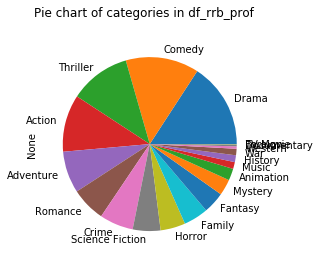

In [46]:
flat_list = get_cate_list(df_rrb_prof['genres'])
cat_series = pd.Series(flat_list)
cat_series.value_counts().plot(kind='pie');
pl.suptitle('Pie chart of categories in df_rrb_prof');

Portions of each categories are divided quite equally.

Analyze categories of unprofitable films by pie chart.

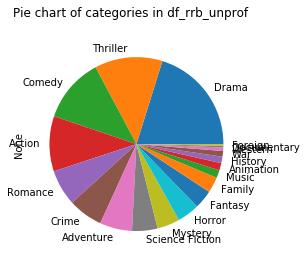

In [47]:
flat_list = get_cate_list(df_rrb_unprof['genres'])
cat_series = pd.Series(flat_list)
cat_series.value_counts().plot(kind='pie');
pl.suptitle('Pie chart of categories in df_rrb_unprof');

Unprofitable films' categories are also divided equally. Cannot observe any significant difference.

Draw scatter plot of release_year and revenue/budget. Does revenue/budget get better by time?

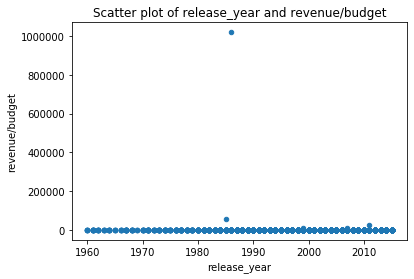

In [48]:
ax = df_rrb_prof.plot.scatter(x='release_year', y='revenue/budget', title='Scatter plot of release_year and revenue/budget');
ax.set_xlabel('release_year');
ax.set_ylabel('revenue/budget');

That scatter plot was highly influence by very high value revenue/budget. 

Therefor, draw the scatter plot of df_ratio_middle. 

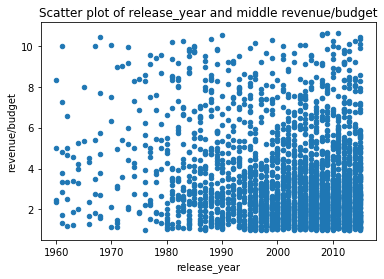

In [49]:
ax = df_ratio_middle.plot.scatter(x='release_year', y='revenue/budget', title='Scatter plot of release_year and middle revenue/budget');
ax.set_xlabel('release_year');
ax.set_ylabel('revenue/budget');

The revenue/budget has a tendency to grow yearly.

### Research Question 3  (Does vote count affect vote grade?)

Draw the histogram of vote_count to see the distribution.

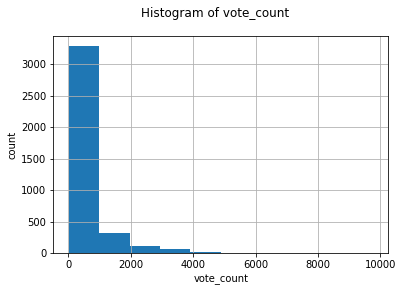

In [50]:
ax = df_rrb['vote_count'].hist();
pl.suptitle('Histogram of vote_count');
ax.set_xlabel('vote_count');
ax.set_ylabel('count');

Histogram has a highly skewed count.

Use boxplot to see outliers.

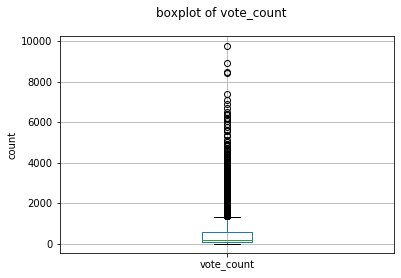

In [51]:
ax = df_rrb.boxplot(column=['vote_count']);
pl.suptitle('boxplot of vote_count');
ax.set_ylabel('count');

There are multiple high vote_count that belong to outliers.

Use get_limit to get high and low limit.

In [52]:
high_limit, low_limit = get_limit(df_rrb['vote_count'])
print(high_limit, low_limit)

1343.5 -692.5


Use vote count's high limit to separate data.

In [53]:
df_count_middle = df_rrb[ df_rrb['vote_count'] <= high_limit ]
df_count_high = df_rrb[ df_rrb['vote_count'] > high_limit ]

Draw the histogram again.

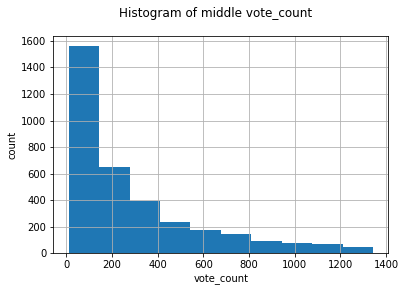

In [54]:
ax = df_count_middle['vote_count'].hist();
pl.suptitle('Histogram of middle vote_count');
ax.set_xlabel('vote_count');
ax.set_ylabel('count');

The distribution of vote_count gets less. Reality is like this.

Draw histogram of high vote_count.

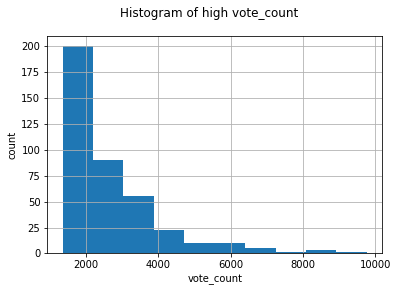

In [55]:
ax = df_count_high['vote_count'].hist();
pl.suptitle('Histogram of high vote_count');
ax.set_xlabel('vote_count');
ax.set_ylabel('count');

High vote_count also gets less gradually.

Extract the highest vote_count row to observe.

In [58]:
max_vote = df_count_high['vote_count'].max()
df_count_high[ df_count_high['vote_count'] == max_vote ]

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue/budget
1919,9.363643,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,9767,7.9,2010,160000000.0,825500000.0,5.159375


It is the acclaimed movie Inception.

Draw scatter plot of vote_count and vote average to see the correlations.

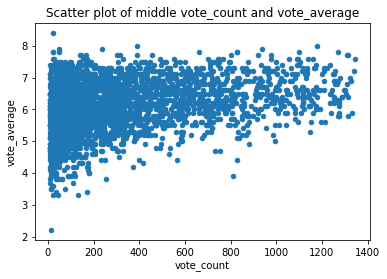

In [56]:
df_count_middle.plot.scatter(x='vote_count', y='vote_average', title='Scatter plot of middle vote_count and vote_average');

Middle vote_count v.s. vote_average has a positive correlation.

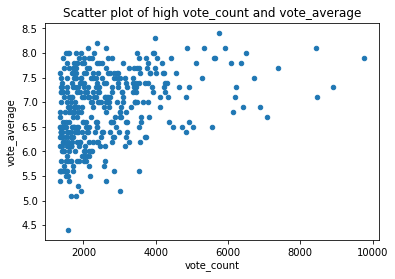

In [57]:
df_count_high.plot.scatter(x='vote_count', y='vote_average', title='Scatter plot of high vote_count and vote_average');

High vote_count v.s. vote_average has a positive correlation.

Draw the scatter plot of release_year and vote_count to see the trend.

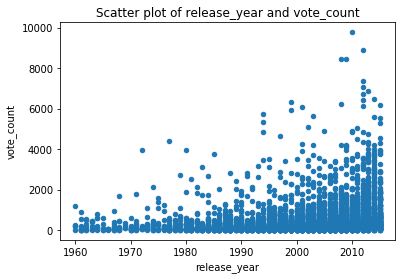

In [58]:
df_rrb.plot.scatter(y='vote_count', x='release_year', title='Scatter plot of release_year and vote_count');

Films released later garner more vote_count.

Draw the scatter plot of release_year and vote_average to see the trend.

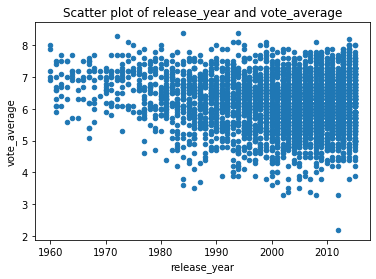

In [59]:
df_rrb.plot.scatter(y='vote_average', x='release_year', title='Scatter plot of release_year and vote_average');

Films released later get lower vote_average or wider range of vote_average.

Draw the scatter plot of vote_average and popularity to see if the higher score the more popularity.

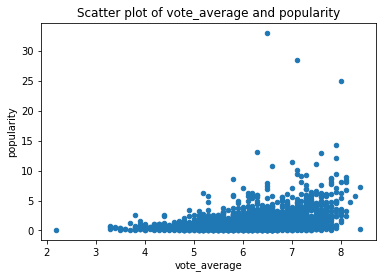

In [60]:
df_rrb.plot.scatter(x='vote_average', y='popularity', title='Scatter plot of vote_average and popularity');

There is a tendency that higher vote_average gets better popularity.

Draw the scatter plot of vote_average and revenue to see if the higher score the more revenue. Same with vote_average and revenue/budget.

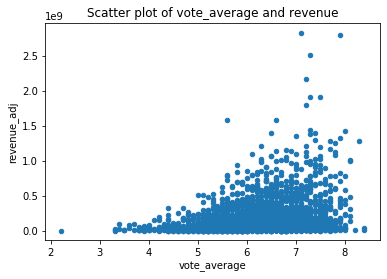

In [61]:
df_rrb.plot.scatter(x='vote_average', y='revenue_adj', title='Scatter plot of vote_average and revenue');

The higher vote_average, the higher revenue!

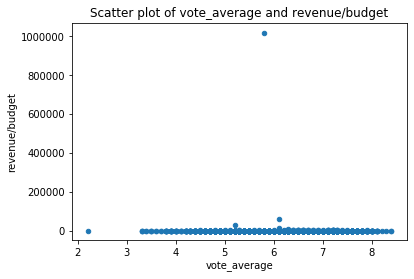

In [62]:
df_rrb.plot.scatter(x='vote_average', y='revenue/budget', title='Scatter plot of vote_average and revenue/budget');

This scatter plot is influenced greatly by a revenue/budget outlier with value 1,000,0000.

Draw the scatter plot of vote_average and **middle** revenue/budget.

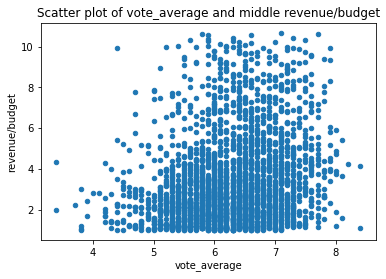

In [63]:
df_ratio_middle.plot.scatter(x='vote_average', y='revenue/budget', title='Scatter plot of vote_average and middle revenue/budget');

For middle revenue/budget, vote_average v.s. revenue/budget have a positve correlation.

<a id='conclusions'></a>
## Conclusions


### Limitations
- There are 10866 rows in the TMDB dataframe.
- There are 1 duplicate and multiple missing values in this dataframe.
- For String values(homepage, keywords, etc), values needs to be filled by other resources.
- For number values(runtime, revenue, budget), we left out questionable rows. That is rows with no rutime and not revenue and no budget are filtered out.
  In the end, we are left with 3854 rows to analyze.

### 1 About runtime
- From runtime's histogram, runtime of films have normal distribution.
   Most of them fall in 80 to 140 minutes.
- From scatter plot of runtime v.s. revenue, we can see a positive correlation between runtime and revenue.
   The same can be said to the relationship of runtime v.s. budget.
- For outlier's, runtime v.s revenue and runtime v.s. budget have negative correlation.

### 2 About revenue/budget: this value is conducted to refect the profit of each films. For revenue/budget > 1, these films indicate a positive profit.    
- From the histogram, revenue/budget > 1 mostly range from 1~10.
- The Karate Kids, Part II crowns the most profit film, with a revenue/budget of 1.018619e+06. Yet according to wiki, its budget is 13 million and box office 115.1 million. That is a ratio of 8.85, far less than 1.018619e+06. This would make me wonder which data source is more reliable.
- Categories of profitable and unprofitable movies were analyzed using the pie chart. It does not show any significant difference.
- Over the years, the scatter plot of release_year v.s. revenue/budget implies the growth of profitability.

### 3 About vote count
- From histogram, most films receive votes under 1400. The most rated film is Inception, with vote number 9767 and score average 7.9 .
- Vote count and vote average have a positive correlation, indicating more audience's vote might raise the score.
- Films released earlier receive less vote but higher score.
- Vote score has positive correlation with popularity, revenue, revenue/budget. So vote score can be a good factor to choose which film to watch.